In [1]:
import tskit
import pyslim
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [5]:
tskit.LibraryError

_tskit.LibraryError

In [3]:
ts = tskit.load(f"xtreme0630neu_Nb500_164001_slim.trees")

In [4]:
assert max(t.num_roots for t in ts.trees()) == 1
sim_len = ts.sequence_length

In [5]:
center_gen = ts.at(sim_len/2)
subtree_size = np.empty((len(list(center_gen.nodes())), 2), dtype=int) # node_id | total leaves
for idx, nd in enumerate(center_gen.nodes()):
    for samp_nd in center_gen.samples(nd):
        assert center_gen.population(samp_nd) == 0
    subtree_size[idx] = [nd, center_gen.num_samples(nd)] ## samples, not individuals

intNode_AF = subtree_size[:,1]/ts.num_samples

In [13]:
AF_thr = np.random.uniform(0.25, 0.95)
mut_nd_idx = np.abs(intNode_AF - AF_thr).argmin()

In [14]:
AF_init = intNode_AF[mut_nd_idx]

In [15]:
mut_nd = subtree_size[mut_nd_idx, 0]

In [16]:
init_tables = ts.dump_tables()

In [17]:
init_tables.sites.clear()
init_tables.mutations.clear()

In [18]:
mut_site_id = init_tables.sites.add_row(position=sim_len/2, ancestral_state="A")

In [19]:
init_tables.mutations.add_row(site=mut_site_id, node=mut_nd, derived_state="T", time=int(np.ceil(ts.node(mut_nd).time)),
                              metadata={'mutation_list':[pyslim.default_slim_metadata("mutation_list_entry")]})

0

In [20]:
init_tables.mutations

id,site,node,time,derived_state,parent,metadata
0,0,38579,1192,T,-1,{'mutation_list': [{'mutation_type': ...


In [21]:
ts = init_tables.tree_sequence()

In [22]:
print("Neu mutation @ node:", ts.node(mut_nd))
print(subtree_size[mut_nd_idx])

Neu mutation @ node: Node(id=38579, flags=0, time=1191.9970016141951, population=0, individual=-1, metadata=None)
[38579  9510]


In [23]:
sampN = np.random.choice(ts.samples(), size=128, replace=False)
sts = ts.simplify(samples=sampN)

print(f"Simplify: {ts.num_samples}/{ts.num_individuals} -> {sts.num_samples}/{sts.num_individuals}")

Simplify: 20000/10000 -> 128/128


In [24]:
sts

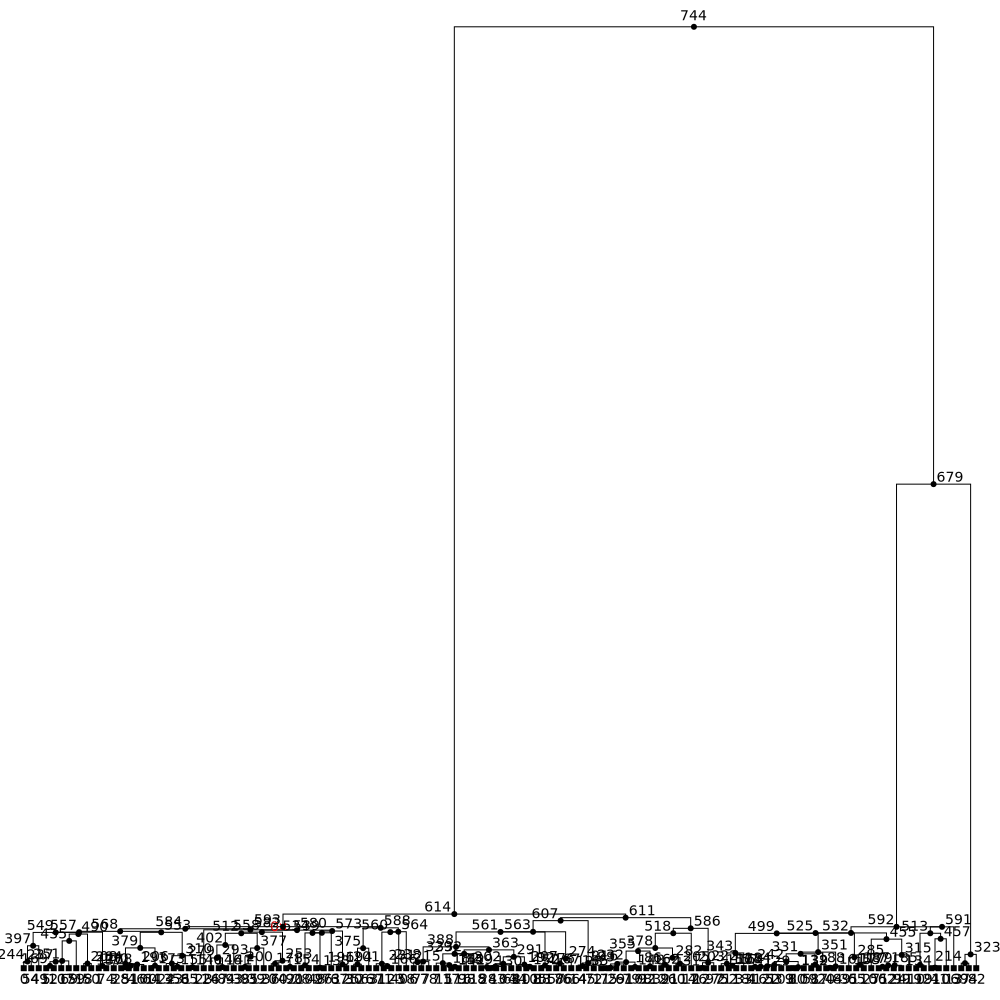

In [25]:
sts.at(sim_len/2).draw_svg(size=(1000, 1000))